1749.1218487394958


(array([1.555e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 9.000e+00, 8.000e+00, 3.000e+00, 1.300e+01, 5.900e+01,
        3.000e+01, 1.800e+01, 2.200e+01, 2.800e+01, 1.200e+01, 1.800e+01,
        1.300e+01, 9.000e+00, 2.800e+01, 1.300e+01, 4.000e+00, 9.000e+00,
        4.000e+00, 1.300e+01, 1.600e+01, 1.700e+01, 2.100e+01, 2.100e+01,
        2.100e+01, 4.000e+00, 9.000e+00, 7.000e+00, 1.200e+01, 1.300e+01,
        1.500e+01, 1.000e+01, 1.000e+01, 8.000e+00, 7.000e+00, 1.600e+01,
        7.000e+00, 1.100e+01, 8.000e+00, 6.000e+00, 6.000e+00, 9.000e+00,
        5.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 9.000e+00, 6.000e+00,
        2.000e+00, 7.000e+00, 8.000e+00, 1.100e+01, 4.000e+00, 6.000e+00,
        6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 5.000e+00,
        1.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00, 1.000e+0

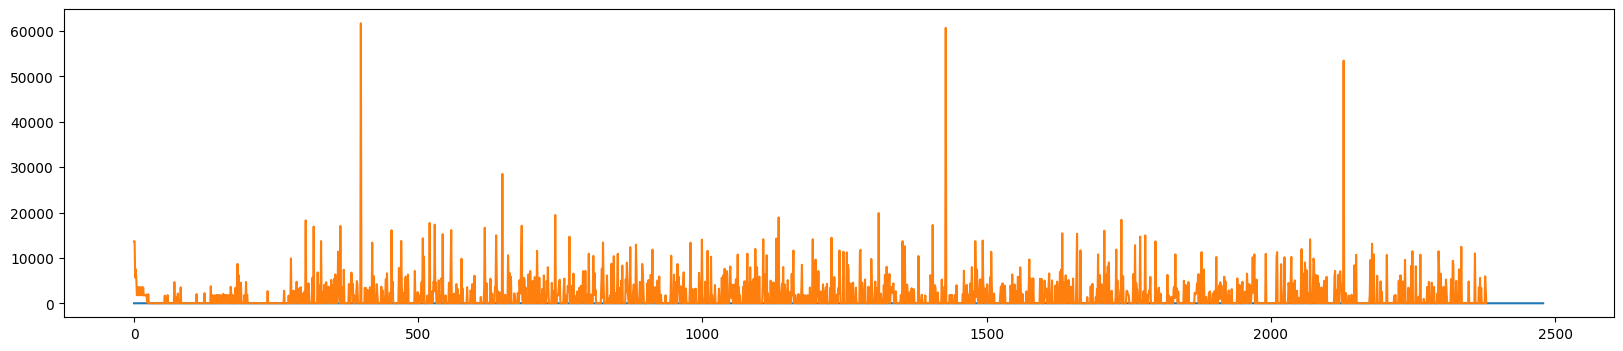

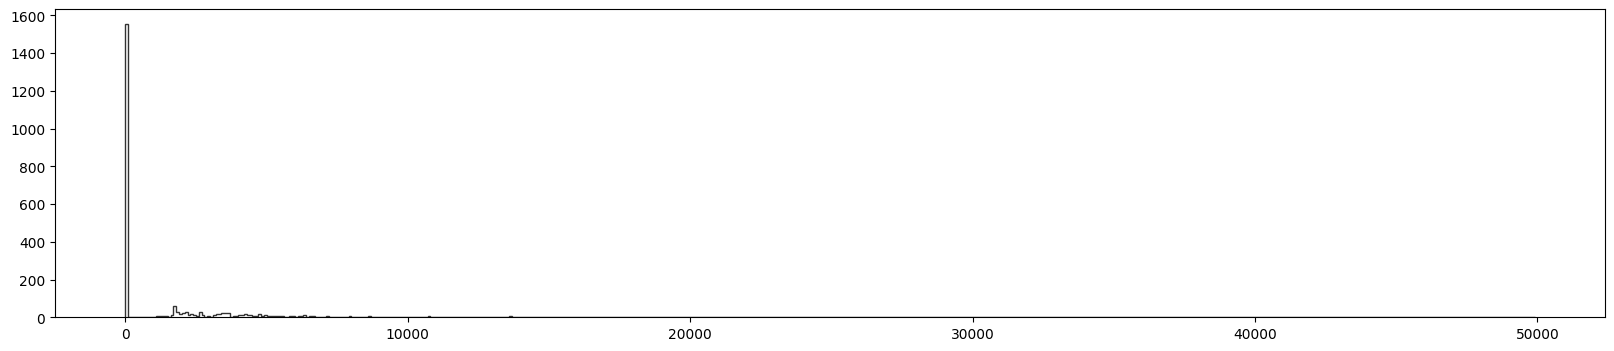

In [15]:
from matplotlib import pyplot as plt

ipFile = "../stat/tcpdump_rtt.txt"
tcpFile = "../stat/tcpprobe_rtt.txt"
cwndFile = "../stat/cwnd.txt"
shift = 5

with open(ipFile,"r") as f:
    ip_rtt = [int(r) for r in f.readlines()][shift:]
with open(tcpFile,"r") as f:
    tcp_rtt = [int(r) for r in f.readlines()][:-1 * shift]
with open(cwndFile,"r") as f:
    cwnd = [int(r) * 100 for r in f.readlines()][:-1 * shift]


if (len(ip_rtt) > len(tcp_rtt)):
    ip_rtt = ip_rtt[:len(tcp_rtt)]
if (len(ip_rtt) < len(tcp_rtt)):
    tcp_rtt = tcp_rtt[:len(ip_rtt)]
delta = [tcp_rtt[i]-ip_rtt[i] for i in range(len(ip_rtt))][100:]
print(sum(delta)/len(delta))

plt.figure(figsize=(20,4))
plt.plot([0] * len(ip_rtt))
plt.plot(delta)
plt.figure(figsize=(20,4))
plt.hist(delta, bins=[100* i for i in range(500)], cumulative=False,histtype='step', alpha=0.8, color='k')

# plt.plot(cwnd)
# plt.plot(ip_rtt, label="ip")
# plt.plot(tcp_rtt,label="tcp")

